Generating 100x100 maze with DFS...
Solving maze with DFS...
Plotting maze and solution path...


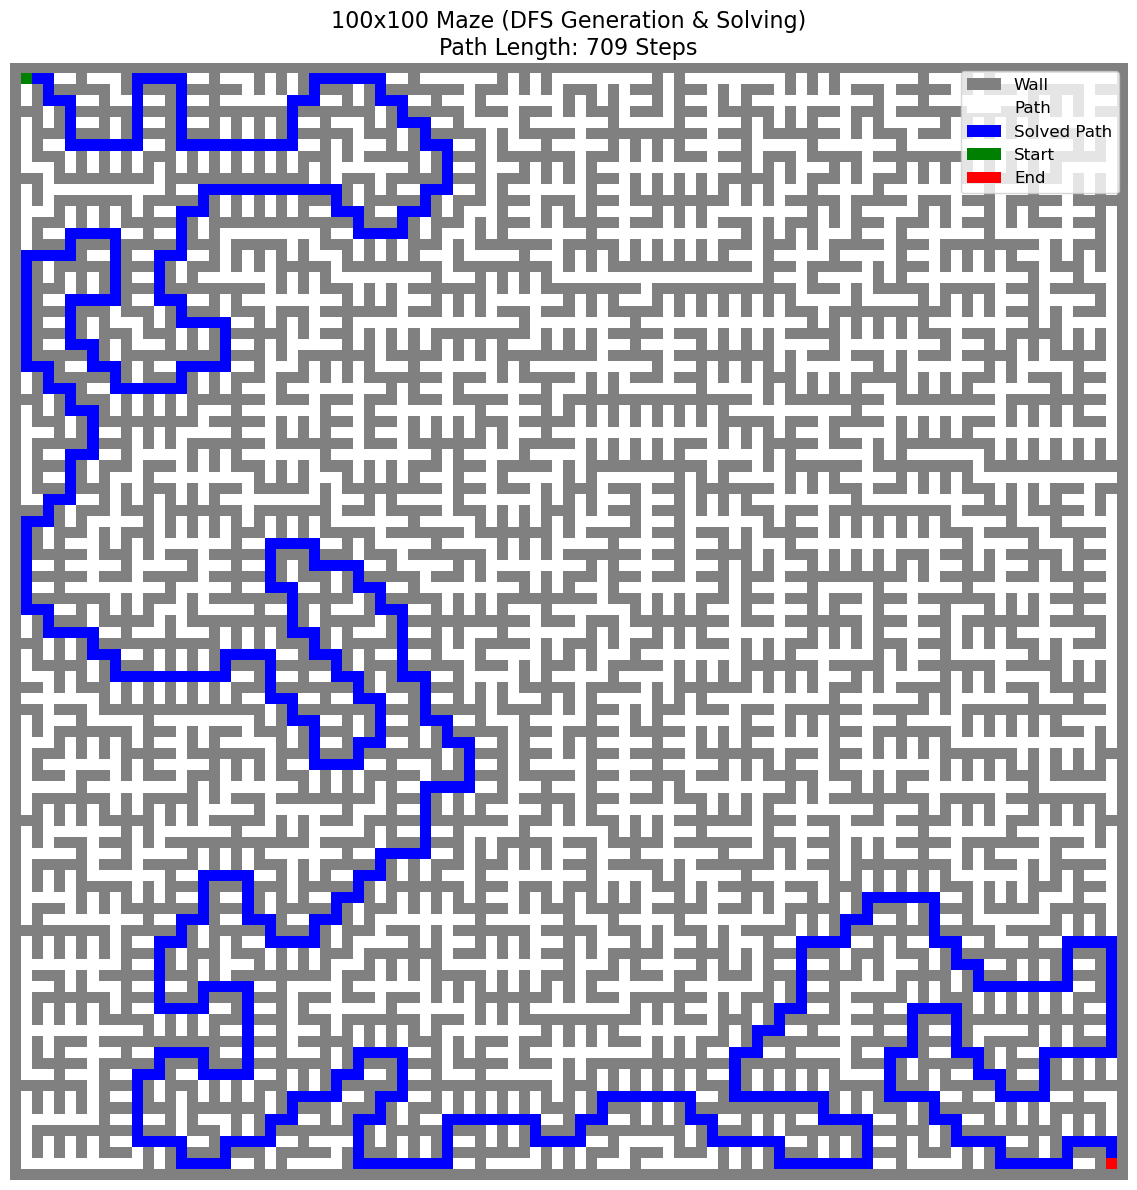

Maze dimensions: 101x101
Solution path length: 709 steps (from start to end)
Start point: (1, 1), End point: (99, 99)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
from typing import List, Tuple

# --------------------------
# 1. Maze Generation with DFS
# --------------------------
def generate_maze_dfs(width: int, height: int) -> np.ndarray:
    """
    Generate a random maze using Depth-First Search (DFS) algorithm.
    
    Args:
        width: Number of columns in the maze (x-axis)
        height: Number of rows in the maze (y-axis)
    
    Returns:
        np.ndarray: Maze grid where:
                    - 1 = Wall
                    - 0 = Path
    """
    # Initialize maze with all walls (1). Use odd indices for paths to ensure wall borders.
    maze = np.ones((height, width), dtype=int)
    # Stack to track DFS traversal (stores (y, x) coordinates)
    dfs_stack = []
    # Starting point (must be odd indices to avoid border walls)
    start_y, start_x = 1, 1
    # Mark start as path (0) and add to stack
    maze[start_y, start_x] = 0
    dfs_stack.append((start_y, start_x))
    
    # Define 4 possible movement directions (up, down, left, right)
    directions = [(-2, 0), (2, 0), (0, -2), (0, 2)]  # Step 2 to skip wall between cells
    
    while dfs_stack:
        # Current position (LIFO: Last-In-First-Out for DFS)
        current_y, current_x = dfs_stack.pop()
        # Shuffle directions to ensure random maze generation
        random.shuffle(directions)
        
        for dy, dx in directions:
            # Calculate next cell position (skip wall)
            next_y = current_y + dy
            next_x = current_x + dx
            # Check if next cell is within bounds and still a wall (1)
            if (1 <= next_y < height - 1) and (1 <= next_x < width - 1) and (maze[next_y, next_x] == 1):
                # Carve path: mark next cell as path (0) and remove the wall between current and next
                maze[next_y, next_x] = 0
                maze[current_y + dy//2, current_x + dx//2] = 0  # Remove middle wall
                # Add next cell to DFS stack for further traversal
                dfs_stack.append((next_y, next_x))
    
    # Set fixed start (bottom-left) and end (top-right) points (ensure they are paths)
    maze[1, 1] = 0  # Start (y=1, x=1)
    maze[height-2, width-2] = 0  # End (y=height-2, x=width-2)
    
    return maze

# --------------------------
# 2. Maze Solving with DFS
# --------------------------
def solve_maze_dfs(maze: np.ndarray, start: Tuple[int, int], end: Tuple[int, int]) -> List[Tuple[int, int]]:
    """
    Solve a maze using Depth-First Search (DFS) algorithm.
    
    Args:
        maze: Maze grid generated by generate_maze_dfs()
        start: (y, x) coordinates of the start point
        end: (y, x) coordinates of the end point
    
    Returns:
        List[Tuple[int, int]]: Path from start to end (empty list if no path exists)
    """
    # Get maze dimensions
    height, width = maze.shape
    # Visited matrix to avoid revisiting cells
    visited = np.zeros((height, width), dtype=bool)
    # Stack for DFS: stores (current_y, current_x, path_so_far)
    dfs_stack = [(start[0], start[1], [start])]
    # Mark start as visited
    visited[start[0], start[1]] = True
    # Define 4 possible movement directions (up, down, left, right)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Step 1 for adjacent cells
    
    while dfs_stack:
        current_y, current_x, current_path = dfs_stack.pop()
        
        # Check if current position is the end
        if (current_y, current_x) == end:
            return current_path  # Return the path if end is reached
        
        # Explore all directions
        for dy, dx in directions:
            next_y = current_y + dy
            next_x = current_x + dx
            # Check if next cell is within bounds, is a path (0), and not visited
            if (0 <= next_y < height) and (0 <= next_x < width):
                if (maze[next_y, next_x] == 0) and (not visited[next_y, next_x]):
                    visited[next_y, next_x] = True
                    # Create new path by appending next cell
                    new_path = current_path.copy()
                    new_path.append((next_y, next_x))
                    # Add to stack for further exploration
                    dfs_stack.append((next_y, next_x, new_path))
    
    # Return empty list if no path exists (should not happen for DFS-generated mazes)
    return []

# --------------------------
# 3. Visualize Maze and Path
# --------------------------
def plot_maze_and_path(maze: np.ndarray, path: List[Tuple[int, int]], title: str) -> None:
    """
    Visualize the maze and the solved path using matplotlib.
    
    Args:
        maze: Maze grid generated by generate_maze_dfs()
        path: Solved path from solve_maze_dfs()
        title: Title of the plot
    """
    # Define colormap: 1=Wall (gray), 0=Path (white)
    cmap = ListedColormap(['white', 'gray'])
    # Create a copy of maze for plotting (to overlay path without modifying original)
    maze_plot = maze.copy()
    height, width = maze.shape
    
    # Overlay path on maze_plot: mark path with 2 (blue)
    for y, x in path:
        if 0 <= y < height and 0 <= x < width:
            maze_plot[y, x] = 2  # Path marker
    
    # Add start (green) and end (red) markers
    start_y, start_x = path[0]
    end_y, end_x = path[-1]
    maze_plot[start_y, start_x] = 3  # Start marker
    maze_plot[end_y, end_x] = 4      # End marker
    
    # Update colormap to include path, start, and end
    new_cmap = ListedColormap(['white', 'gray', 'blue', 'green', 'red'])
    
    # Create plot
    plt.figure(figsize=(12, 12))  # Adjust figure size for 100x100 maze readability
    plt.imshow(maze_plot, cmap=new_cmap, interpolation='none')
    plt.title(title, fontsize=16)
    plt.axis('off')  # Hide axes for cleaner look
    
    # Add legend (custom handles)
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='gray', label='Wall'),
        Patch(facecolor='white', label='Path'),
        Patch(facecolor='blue', label='Solved Path'),
        Patch(facecolor='green', label='Start'),
        Patch(facecolor='red', label='End')
    ]
    plt.legend(handles=legend_elements, loc='upper right', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# --------------------------
# 4. Main Execution (Generate → Solve → Plot)
# --------------------------
if __name__ == "__main__":
    # Maze dimensions (100x100, use odd numbers to ensure proper wall borders)
    MAZE_WIDTH = 101  # Use 101 instead of 100 for odd width (better wall-path structure)
    MAZE_HEIGHT = 101
    # Generate maze
    print("Generating 100x100 maze with DFS...")
    maze = generate_maze_dfs(width=MAZE_WIDTH, height=MAZE_HEIGHT)
    
    # Define start (bottom-left) and end (top-right) points
    start_point = (1, 1)
    end_point = (MAZE_HEIGHT - 2, MAZE_WIDTH - 2)
    
    # Solve maze
    print("Solving maze with DFS...")
    solution_path = solve_maze_dfs(maze, start=start_point, end=end_point)
    
    # Plot results
    print("Plotting maze and solution path...")
    plot_maze_and_path(
        maze=maze,
        path=solution_path,
        title=f"100x100 Maze (DFS Generation & Solving)\nPath Length: {len(solution_path)} Steps"
    )
    
    # Print basic stats
    print(f"Maze dimensions: {MAZE_WIDTH}x{MAZE_HEIGHT}")
    print(f"Solution path length: {len(solution_path)} steps (from start to end)")
    print(f"Start point: {start_point}, End point: {end_point}")

In [3]:
from dataclasses import dataclass
import time
from typing import Callable, Dict, Any, Optional, List, Tuple

@dataclass
class AlgoResult:
    name: str
    success: bool
    path_length: int          # nodes in path
    edges: int                # path_length - 1 if success else 0
    nodes_expanded: int
    runtime_ms: float

def timed_run(name: str,
              solver: Callable[[np.ndarray, Tuple[int,int], Tuple[int,int]], Dict[str, Any]],
              maze: np.ndarray,
              start: Tuple[int,int],
              end: Tuple[int,int]) -> AlgoResult:
    t0 = time.perf_counter()
    out = solver(maze, start, end)      # must return dict with keys below
    t1 = time.perf_counter()
    path = out.get("path", [])
    nodes_expanded = int(out.get("nodes_expanded", 0))
    success = len(path) > 0 and path[-1] == end
    L = len(path)
    return AlgoResult(
        name=name,
        success=bool(success),
        path_length=L,
        edges=max(0, L-1) if success else 0,
        nodes_expanded=nodes_expanded,
        runtime_ms=(t1 - t0) * 1_000.0
    )


In [4]:
def solve_maze_dfs_instrumented(maze: np.ndarray,
                                start: Tuple[int,int],
                                end: Tuple[int,int]) -> Dict[str, Any]:
    h, w = maze.shape
    visited = np.zeros((h, w), dtype=bool)
    stack = [(start[0], start[1], [start])]
    visited[start[0], start[1]] = True
    dirs = [(-1,0),(1,0),(0,-1),(0,1)]
    nodes_expanded = 0

    while stack:
        y, x, path = stack.pop()
        nodes_expanded += 1
        if (y, x) == end:
            return {"path": path, "nodes_expanded": nodes_expanded}
        for dy, dx in dirs:
            ny, nx = y+dy, x+dx
            if 0 <= ny < h and 0 <= nx < w and maze[ny, nx] == 0 and not visited[ny, nx]:
                visited[ny, nx] = True
                stack.append((ny, nx, path + [(ny, nx)]))
    return {"path": [], "nodes_expanded": nodes_expanded}


In [5]:
from collections import deque

def solve_maze_bfs_instrumented(maze: np.ndarray,
                                start: Tuple[int,int],
                                end: Tuple[int,int]) -> Dict[str, Any]:
    h, w = maze.shape
    visited = np.zeros((h, w), dtype=bool)
    parent = {start: None}
    q = deque([start])
    visited[start] = True
    dirs = [(-1,0),(1,0),(0,-1),(0,1)]
    nodes_expanded = 0

    while q:
        y, x = q.popleft()
        nodes_expanded += 1
        if (y, x) == end:
            # reconstruct
            path = []
            cur = end
            while cur is not None:
                path.append(cur)
                cur = parent[cur]
            path.reverse()
            return {"path": path, "nodes_expanded": nodes_expanded}
        for dy, dx in dirs:
            ny, nx = y+dy, x+dx
            if 0 <= ny < h and 0 <= nx < w and maze[ny, nx] == 0 and not visited[ny, nx]:
                visited[ny, nx] = True
                parent[(ny, nx)] = (y, x)
                q.append((ny, nx))
    return {"path": [], "nodes_expanded": nodes_expanded}


In [6]:
import heapq

def solve_maze_astar_instrumented(maze: np.ndarray,
                                  start: Tuple[int,int],
                                  end: Tuple[int,int]) -> Dict[str, Any]:
    h, w = maze.shape
    def hfun(p: Tuple[int,int]) -> int:
        return abs(p[0]-end[0]) + abs(p[1]-end[1])
    g = {start: 0}
    parent = {start: None}
    openpq = [(hfun(start), 0, start)]
    in_open = {start}
    nodes_expanded = 0
    dirs = [(-1,0),(1,0),(0,-1),(0,1)]

    while openpq:
        f, gcur, cur = heapq.heappop(openpq)
        in_open.discard(cur)
        nodes_expanded += 1
        if cur == end:
            path = []
            x = cur
            while x is not None:
                path.append(x)
                x = parent[x]
            path.reverse()
            return {"path": path, "nodes_expanded": nodes_expanded}
        cy, cx = cur
        for dy, dx in dirs:
            ny, nx = cy+dy, cx+dx
            if 0 <= ny < h and 0 <= nx < w and maze[ny, nx] == 0:
                cand = g[cur] + 1
                if cand < g.get((ny, nx), 1_000_000_000):
                    g[(ny, nx)] = cand
                    parent[(ny, nx)] = cur
                    fn = cand + hfun((ny, nx))
                    if (ny, nx) not in in_open:
                        heapq.heappush(openpq, (fn, cand, (ny, nx)))
                        in_open.add((ny, nx))
    return {"path": [], "nodes_expanded": nodes_expanded}


In [7]:
import csv
from pathlib import Path

def benchmark_algorithms(maze: np.ndarray,
                         start: Tuple[int,int],
                         end: Tuple[int,int],
                         algos: List[Tuple[str, Callable]],
                         csv_path: Optional[str] = "results.csv") -> List[AlgoResult]:
    results: List[AlgoResult] = []
    for name, fn in algos:
        res = timed_run(name, fn, maze, start, end)
        results.append(res)
        print(f"{name:8} | success={res.success} | edges={res.edges} | "
              f"expanded={res.nodes_expanded} | time={res.runtime_ms:.3f} ms")
    if csv_path:
        path = Path(csv_path)
        write_header = not path.exists()
        with path.open("a", newline="") as f:
            w = csv.writer(f)
            if write_header:
                w.writerow(["name","success","path_length","edges","nodes_expanded","runtime_ms"])
            for r in results:
                w.writerow([r.name, int(r.success), r.path_length, r.edges, r.nodes_expanded, round(r.runtime_ms,3)])
    return results



In [8]:
def plot_bars(results: List[AlgoResult], metric: str, title: str):
    # metric ∈ {"edges","nodes_expanded","runtime_ms"}
    vals = [getattr(r, metric) for r in results]
    names = [r.name for r in results]
    plt.figure(figsize=(7,5))
    plt.bar(names, vals)
    plt.ylabel(metric.replace("_"," "))
    plt.title(title)
    for i, v in enumerate(vals):
        plt.text(i, v, f"{v:.1f}" if isinstance(v, float) else f"{v}", ha="center", va="bottom", fontsize=9, rotation=0)
    plt.tight_layout()
    plt.show()


In [9]:
def overlay_path(fig_title: str, maze: np.ndarray, path: List[Tuple[int,int]]):
    # 0=path cells, 1=walls, 2=solution
    mp = maze.copy()
    for y, x in path:
        mp[y, x] = 2
    cmap = ListedColormap(['white','gray','blue'])
    plt.figure(figsize=(6,6))
    plt.imshow(mp, cmap=cmap, interpolation='none')
    plt.axis('off')
    plt.title(fig_title)
    plt.tight_layout()
    plt.show()

def visualize_all_paths(maze: np.ndarray, results: List[AlgoResult], paths: Dict[str, List[Tuple[int,int]]]):
    for r in results:
        overlay_path(f"{r.name} | edges={r.edges} | expanded={r.nodes_expanded} | {r.runtime_ms:.2f} ms",
                     maze, paths.get(r.name, []))


DFS      | success=True | edges=536 | expanded=2927 | time=19.809 ms
BFS      | success=True | edges=536 | expanded=1484 | time=3.865 ms
A*       | success=True | edges=536 | expanded=1293 | time=11.402 ms


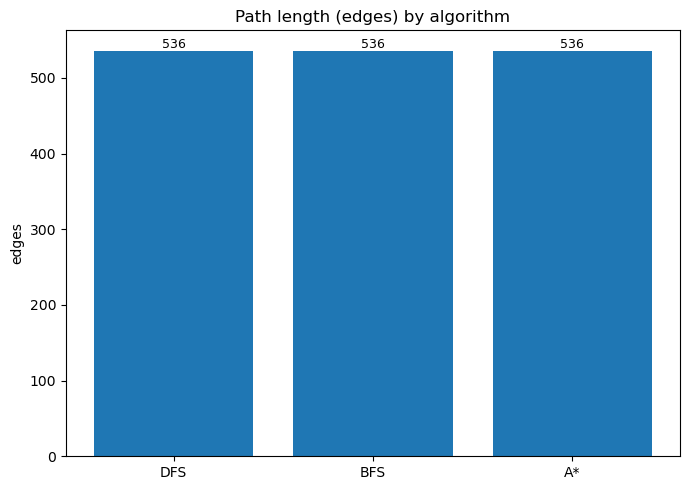

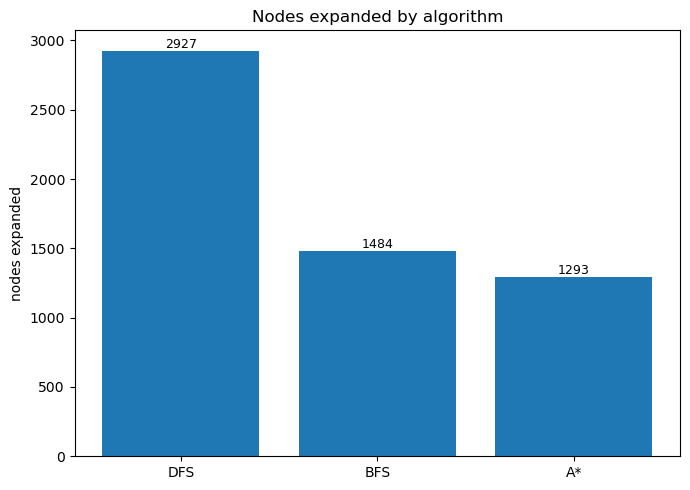

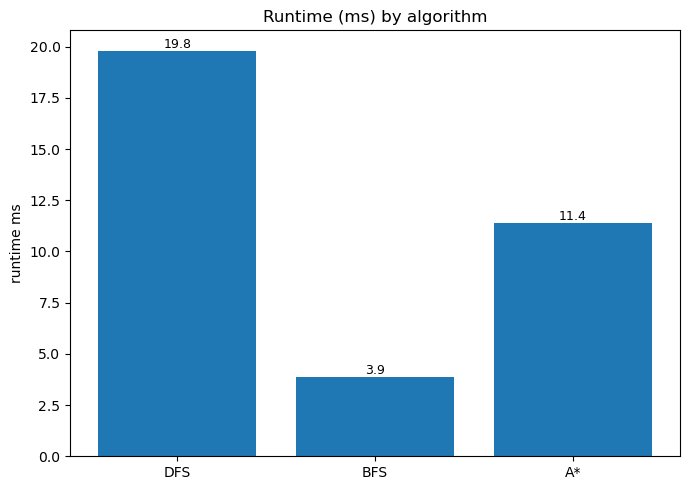

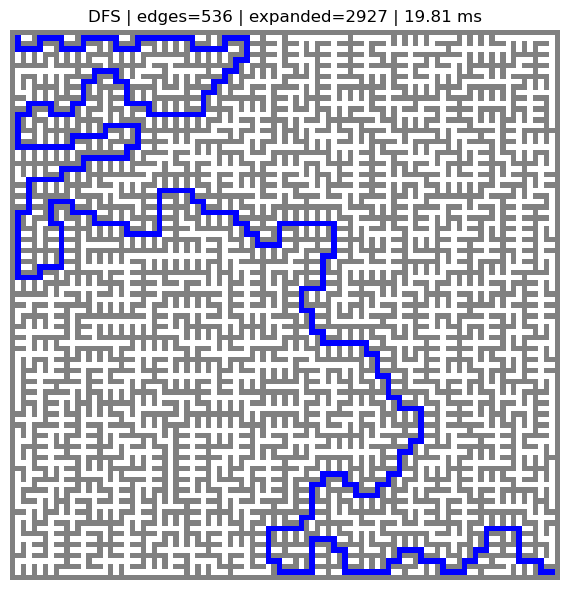

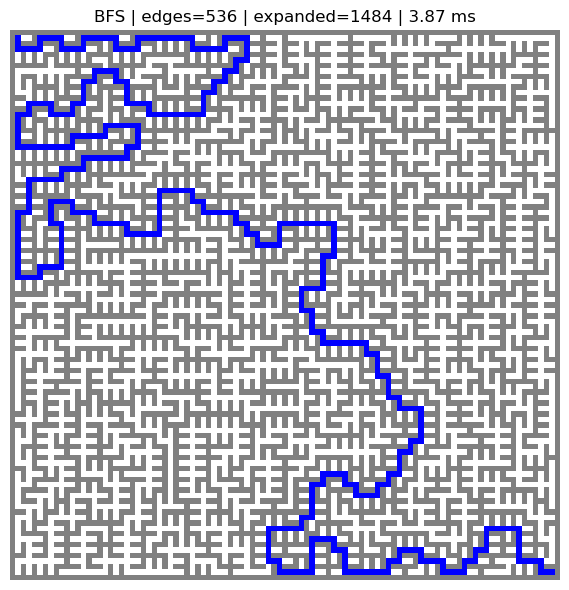

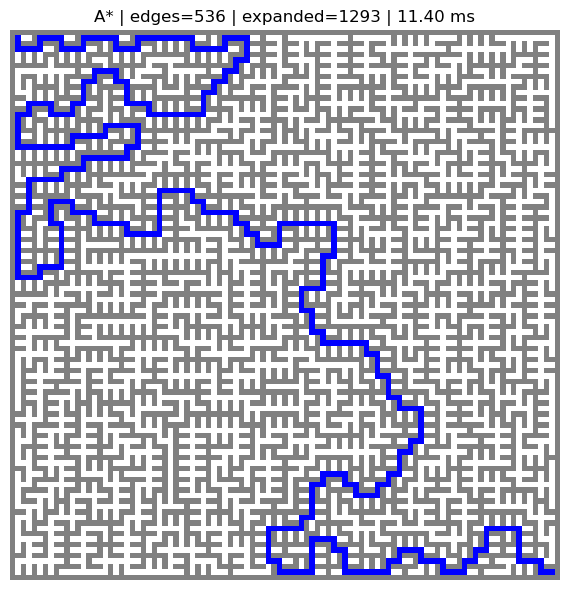

In [10]:
if __name__ == "__main__":
    MAZE_WIDTH, MAZE_HEIGHT = 101, 101
    maze = generate_maze_dfs(MAZE_WIDTH, MAZE_HEIGHT)  # your generator
    start_point = (1, 1)
    end_point   = (MAZE_HEIGHT-2, MAZE_WIDTH-2)

    algos = [
        ("DFS",  solve_maze_dfs_instrumented),
        ("BFS",  solve_maze_bfs_instrumented),
        ("A*",   solve_maze_astar_instrumented),
    ]

    # Run
    results = benchmark_algorithms(maze, start_point, end_point, algos, csv_path="results.csv")

    # Build a name→path dict for visualization
    name_to_path = {}
    for name, fn in algos:
        out = fn(maze, start_point, end_point)
        name_to_path[name] = out.get("path", [])

    # Compare visuals
    plot_bars(results, "edges",         "Path length (edges) by algorithm")
    plot_bars(results, "nodes_expanded","Nodes expanded by algorithm")
    plot_bars(results, "runtime_ms",    "Runtime (ms) by algorithm")
    visualize_all_paths(maze, results, name_to_path)
